* Note
    - PyRQA supports python2.x, not python3.x
    
* PyRQA installation
    - Follow this [link](https://pypi.python.org/pypi/PyRQA/)
    - When installing fails for macOS, make sure you update gcc4.6+
        - Update `brew` --> update `gcc`

---

## What is RQA?

- A method to quantify underlying **patterns** in the **data**.
    - **data**: time-series data; climate chagnes, music, dynamical system etc.
    - **patterns**: repetitions.

## How to quantify the patterns?

- Simply put, calculate pair-wise distances between data points or vectors and put them into a matrix.
- Plot the matrix and observe carefully!
- Finally, make indeces to quantify the repeating patterns (ref: [Marwan et al., 2007](http://www.sciencedirect.com/science/article/pii/S0370157306004066)).
    - e.g., How long/short are the vertical/diagonal lines?
    - e.g., How much are the patterns complex?
    
## Let's play with a simple speech example
- Data: two sound files with a recording of a word 'rice' in a normal and a fast rate (both sampled at 44,100 Hz; Haskins IEEE rate dataset).
    - 'rice_normal.wav'
    - 'rice_fast.wav'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [5]:
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation, RecurrencePlotComputation
from pyrqa.image_generator import ImageGenerator
from pyrqa.recurrence_analysis import RecurrencePlot

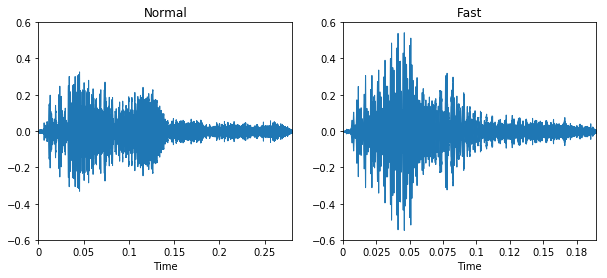

In [6]:
normal = 'rice_normal.wav'
fast = 'rice_fast.wav'
yn, srn = librosa.load(normal)
yf, srf = librosa.load(fast)
plt.figure(figsize=(10,4), facecolor='white')
ax1 = plt.subplot(1,2,1)
plt.title('Normal')
librosa.display.waveplot(yn, sr=srn)
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.title('Fast')
librosa.display.waveplot(yf, sr=srf)

In [180]:
def rqa_analysis(data, save, verbose=True):
    settings = Settings(data,
                        embedding_dimension=2,
                        time_delay=1,
                        neighbourhood=FixedRadius(1.0),
                        similarity_measure=EuclideanMetric,
                        theiler_corrector=1,
                        min_diagonal_line_length=2,
                        min_vertical_line_length=2,
                        min_white_vertical_line_length=2)

    # Get recurrence_matrix
    computation_mat = RecurrencePlotComputation.create(settings)
    rec = computation_mat.run()
    rec_mat = rec.recurrence_matrix
    ImageGenerator.save_recurrence_plot(rec.recurrence_matrix_reverse, save+'.png')

    # Get measurements
    computation = RQAComputation.create(settings)
    result = computation.run()
    if verbose:
        print(result)
    return rec, result

In [181]:
rec_n, result_n = rqa_analysis(yn, 'normal')
rec_f, result_f = rqa_analysis(yf, 'fast')

RQA Result:
-----------
Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 1.000000
Determinism (DET): 0.999838
Average diagonal line length (L): 3092.000000
Longest diagonal line length (L_max): 6182
Divergence (DIV): 0.000162
Entropy diagonal lines (L_entr): 8.729233
Laminarity (LAM): 1.000000
Trapping time (TT): 6183.000000
Longest vertical line length (V_max): 6183
Entropy vertical lines (V_entr): 0.000000
Average white vertical line length (W): 0.000000
Longest white vertical line length (W_max): 0
Entropy white vertical lines (W_entr): 0.000000

Ratio determinism / recurrence rate (DET/RR): 0.999838
Ratio laminarity / determinism (LAM/DET): 1.000162

RQA Result:
-----------
Minimum diagonal line length (L_min): 2
Minimum vertical line length (V_min): 2
Minimum white vertical line length (W_min): 2

Recurrence rate (RR): 0.999750
Determinism (DET): 0.999761
Average diagonal line lengt

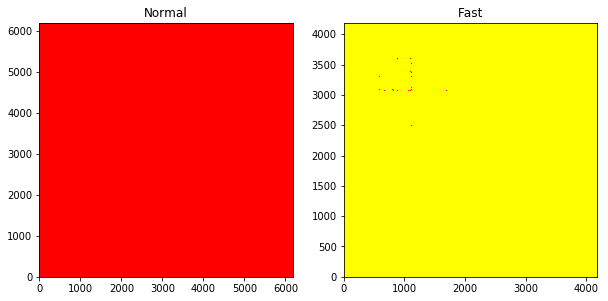

In [182]:
fig, arr = plt.subplots(1,2, figsize=(10,5), facecolor='white')
ax1 = arr[0].imshow(rec_n.recurrence_matrix_reverse, origin='lower', cmap='autumn', interpolation='none')
arr[0].set_title('Normal');
ax2 = arr[1].imshow(rec_f.recurrence_matrix_reverse, origin='lower', cmap='autumn', interpolation='none')
arr[1].set_title('Fast');
# cax = fig.colorbar(ax2, ax=arr.ravel().tolist(), fraction=0.046, pad=0.04)
# cax = fig.colorbar(ax2, fraction=0.046, pad=0.04)

In [183]:
sum(sum(rec_n.recurrence_matrix_reverse))

241137

In [184]:
sum(sum(rec_f.recurrence_matrix_reverse))

369621

## Hmm...
## TODO: check settings (params)
## Read Docs + ref paper